In [1]:
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

### Questão 1

In [3]:
def fatorial(x):
    if x == 0:
        return 1
    else:
        return x * fatorial(x - 1)

n = int(input("Digite um número inteiro:")) 

print("O fatorial de", n, "é:", fatorial(n))


Digite um número inteiro: 3


O fatorial de 3 é: 6


Agora com um ponto flutuante:

In [4]:
def fatorial_float(x):
    if x == 0:
        return 1.0
    else:
        return x * fatorial(x - 1)

n = float(input("Digite um número inteiro:")) 

print("O fatorial de", n, "é:", fatorial_float(n))

Digite um número inteiro: 3


O fatorial de 3.0 é: 6.0


Como vimos no primeiro ex. o resultado é um número muito extenso, então quando o transformamos para um ponto flutuante, sobrepassa o limite de números que são armazenados na mantissa, não sendo possível ter uma precisão.

### Questão 2

In [6]:
#a)

a = float(input("Digite 3 números inteiros:"))
b = float(input(":"))
c = float(input(":"))

def funcao_quadratica(a,b,c):
    
    x_1 = (-b + sqrt((b**2) - 4*a*c))/2*a
    
    x_2 = (-b - sqrt((b**2) - 4*a*c))/2*a
    
    return x_1,x_2

print(funcao_quadratica(a,b,c))


Digite 3 números inteiros: 0,001


ValueError: could not convert string to float: '0,001'

In [ ]:
#b)

d = float(input("Digite 3 números inteiros:"))
e = float(input(":"))
f = float(input(":"))

def funcao_quadratica2(d,e,f):
    
    x_l = 2*f/(-e + sqrt((e**2) - 4*d*f))
    
    x_ll = 2*f/(-e - sqrt((e**2) - 4*d*f))
    
    return x_l,x_ll

print(funcao_quadratica2(d,e,f))

In [7]:
#c)

import cmath 

def funcao_quadratica_geral(a, b, c):
    
    x_1 = 2*c/(-b + sqrt((b**2) - 4*a*c))
    
    x_2 = 2*c/(-b - sqrt((b**2) - 4*a*c))
    
    return x_1, x_2

a = 0.001
b = 1000
c = 0.001

print(funcao_quadratica_geral(a,b,c))


(-1000010.5755125057, -1.000000000001e-06)


### Questão 3

#### a)

In [8]:
def f(x):
    return x * (x - 1)

In [9]:
x = 1
delta = 1e-2
derived = (f(x + delta) - f(x)) / delta

print('Pela fórmula a derivada é:', derived)


Pela fórmula a derivada é: 1.010000000000001


Derivando f(x) analiticamente temos: x² - x  
f'(x) = 2x - 1 
f'(x=1) = 1

O erro acontece pois quando estamos calculando a derivada numericamente, 
aproximamos o delta em um número pequeno, porém finito. Logo, as aproximações 
vão resultar em um erro, e quanto menor for o valor do delta, menor será o erro.


Preferível fazer a separação por fatias h/2[(f(a) + f(a+h))/2 + .....]

#### b)

In [10]:
delta = [1e-4, 1e-6, 1e-8, 1e-10, 1e-12, 1e-14]

for y in delta:
    derivada = (f(x + y) - f(x)) / y
    print ('A derivada com δ = ', y,  'é:', derivada)

A derivada com δ =  0.0001 é: 1.0000999999998899
A derivada com δ =  1e-06 é: 1.0000009999177333
A derivada com δ =  1e-08 é: 1.0000000039225287
A derivada com δ =  1e-10 é: 1.000000082840371
A derivada com δ =  1e-12 é: 1.0000889005833413
A derivada com δ =  1e-14 é: 0.9992007221626509


Os valores começaram a dar errado novamente, pois excedemos o limite de números
na mantissa, o que levará a somar erros novamente.

### Questão 4

### a)

In [11]:
data = pd.read_csv('velocities.txt', delimiter= '\t')
data = pd.DataFrame(data)
data = data.rename(columns={'0': 'tempo(s)', '0.1': 'velocidade(m/s)'})
data

print(data)

    tempo(s)  velocidade(m/s)
0          1         0.069478
1          2         0.137694
2          3         0.204332
3          4         0.269083
4          5         0.331656
..       ...              ...
95        96         0.223073
96        97         0.254244
97        98         0.283753
98        99         0.311479
99       100         0.337308

[100 rows x 2 columns]


Text(0.5, 0, 'tempo(s)')

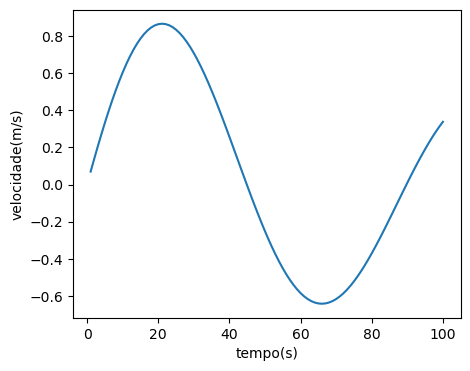

In [12]:
fig = plt.figure(figsize = (5,4))

t = data['tempo(s)']
v = data['velocidade(m/s)']

plt.plot(t,v)
plt.ylabel('velocidade(m/s)')
plt.xlabel('tempo(s)')

### b)

In [13]:
aceleracao = (0.337308 - 0.069478)/100
data['posição'] = v * t
data

,tempo(s),velocidade(m/s),posição
0,1,0.069478,0.069478
1,2,0.137694,0.275388
2,3,0.204332,0.612996
3,4,0.269083,1.076332
4,5,0.331656,1.658280
...,...,...,...
95,96,0.223073,21.415008
96,97,0.254244,24.661668
97,98,0.283753,27.807794
98,99,0.311479,30.836421


Usando a regra do trapézio:

In [14]:
v_i = 0.069478
def f(t):
    return v_i + a * t

a = 0
b = 100
N = 99

h = (b-a)/N
soma = (f(a)+f(b))/2
for k in range(1,N):
    soma = soma + f(a+k*h)

print('Distância percorrida:', h*soma)

Distância percorrida: 6.94780000000001


### Questão 5

### a)

In [15]:
def f(x):
    return x**4 - 2*x + 1

a = 0
b = 2
soma = 0
n = 10
h = (b - a) / n

# Regra do trapézio
for k in range(1, n):
    xk = a + k * h
    soma = soma + f(xk)

integral_t = h * ((f(a) + f(b)) / 2 + soma)

# Regra de Simpson
delta = 1e-4

def derivada(delt, x):
    return (f(x + delt) - f(x)) / delt

term = derivada(delta, a) - derivada(delta, b)
integral_s = integral_t + (1/3) * (h**2) * term
ndez = integral_s

print("Pela regra do Trapézio:", integral_t , "\nSimpson:", integral_s)

Pela regra do Trapézio: 4.50656 
Simpson: 4.079861332265822


### b)

In [16]:
integral_s_n10 = ndez
# Calculando o erro fracional
erro = abs(integral_s_n10 - 4.4) / 4.4
print("Erro fracional com n = 10:\n", erro)

Erro fracional com n = 10:
 0.07275878812140413


### c)

In [20]:
#Com n = 100
a = 0
b = 2
soma = 0
n = 100
h = (b - a) / n

# Regra do trapézio
for k in range(1, n):
    xk = a + k * h
    soma = soma + f(xk)

integral_t = h * ((f(a) + f(b)) / 2 + soma)

# Regra de Simpson
delta = 1e-4

def derivada(delt, x):
    return (f(x + delt) - f(x)) / delt

term = derivada(delta, a) - derivada(delta, b)
integral_s = integral_t + (1/3) * (h**2) * term

ncem = integral_s
print("Com 100 fatias: ", ncem)

Com 100 fatias:  4.396799669322658


In [21]:
a = 0
b = 2
soma = 0
n = 1000
h = (b - a) / n

# Regra do trapézio
for k in range(1, n):
    xk = a + k * h
    soma = soma + f(xk)

integral_t = h * ((f(a) + f(b)) / 2 + soma)

# Regra de Simpson
delta = 1e-4

def derivada(delt, x):
    return (f(x + delt) - f(x)) / delt

term = derivada(delta, a) - derivada(delta, b)
integral_s = integral_t + (1/3) * (h**2) * term

nmil = integral_s
print("Com 1000 fatias: ", nmil)

Com 1000 fatias:  4.399967996798827


In [22]:
integral_s_n100 = ncem
integral_s_n1000 = nmil

erro2 = abs(integral_s_n100 - 4.4) / 4.4
print("Erro fracional com n = 100:", erro2)

erro3 = abs(integral_s_n1000 - 4.4) / 4.4
print("Erro fracional com n = 1000:", erro3)

Erro fracional com n = 100: 0.0007273478812141011
Erro fracional com n = 1000: 7.273454812177378e-06


In [23]:
print('Resultados- regra do trapézio, regra do simpson com 10 fatias, 100 e 1000 respectivamente:\n', integral_t,'\n', ndez,'\n', ncem,'\n', nmil)

Resultados- regra do trapézio, regra do simpson com 10 fatias, 100 e 1000 respectivamente:
 4.4000106666656 
 4.079861332265822 
 4.396799669322658 
 4.399967996798827


Por estes resultados, vemos que a integral que mais se aproxima do resultado analítico é a regra de Simpson com n =1000. Porém, embora o resultado mais aproximado fosse da Regra do Simpson com 1000 fatias, a regra do trapézio mostrou-se melhor no resultado aproximado em comparação com a do Simpson para 10 e 100 fatias.

Além disso, vimos que na Regra de Simpson, quanto mais aumentamos o número de fatias, mais nos aproximamos do resultado analítico, sendo necessário um trabalho maior para o computador fazer os cálculos.